#### Key takeaways from this dataset
- Basic use of Pandas and Exploratory Data Analysis(EDA) which includes cleaning, combining, reshaping, slicing, dicing, and transforming data for analysis purpose.
- Plotting graphs using pandas like countplot, factorplot, swarmplot, barplot, violinplot, hexaplot, piechart, kdeplot, distplot, pairplot etc.
- Using packages like matplotlib and seaborn to develop better insights about the data.
- Create new features which will help in better prediction on hidden aspects of data. 
- Pandas Profiling to get an overall statistical knowldge of the data like any missing values and irregualities present in the data so as to normalize the data for better analysis. 
- Get to know coorelation b/w different variables present in the data which might have an impact on overall finding.
- Drawing final conclusion on the problem at hand.

#### Problem Statement
1. Introduction

#### Approach Used
1. Data Loading and description
2. Data Profiling
3. Data Normalization
4. Identifying the patterns and analysis through questions
    - What is the correlation b/w different parameters
    - What is the trend of movies being produced yr. on yr.
    - How many movies directed by Top 5 directors
    - What is the average Runtime of movies over the yrs.
    - What kind of movies are rated higher
    - Do directors have any role to play in people's choice
5. Final Conclusion

### Introduction:
Analysis of last 10 yrs. (i.e. from 2006-2016) movies data on IMDB and come up with the success factors of any movie and their correlation. 

### Data description and loading the dataset:

The dataset contains 1000 observations of movies data hosted on IMDB.
IMDB (Internet Movie Database) is an online database of information related to films, television programs, home videos and video games, and internet streams, including cast, production crew and personnel biographies, plot summaries, trivia, and fan reviews and ratings.
Users registered on this site are invited to rate any film on a scale of 1 to 10, and the totals are converted into a weighted mean-rating that is displayed beside each title.
It also displays the Metascore of each title. Metascore is the rating given by another movie rating company called Metacritic. However, unlike IMDB, they get ratings from registered well known rating agencies and calculates a weighted average of those ratings.


**Data Dictionary**
- Rank - Movie rank order
- Title - The title of the film
- Genre - A comma-separated list of genres used to classify the film
- Description - Brief one-sentence movie summary
- Director - The name of the film's director
- Actors - A comma-separated list of the main stars of the film
- Year - The year that the film released as an integer.
- Runtime (Minutes) - The duration of the film in minutes.
- Rating - User rating for the movie 0-10
- Votes - Number of votes
- Revenue (Millions) - Movie revenue in millions
- Metascore - An aggregated average of critic scores. Values are between 0 and 100. Higher scores represent positive reviews.

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
%matplotlib inline
sns.set(style="white", color_codes=True)

from subprocess import check_output
from matplotlib.pyplot import pie, axis, show

import warnings
warnings.filterwarnings('ignore')

In [71]:
movies = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv')
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


### Data Profiling

In [3]:
movies.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [4]:
movies.columns.unique()

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [5]:
movies.shape

(1000, 12)

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


In [7]:
movies.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [8]:
profile = pandas_profiling.ProfileReport(movies)
profile.to_file(outputfile="movies_preprofiling.html")

### Data Normalization
Since there are 128 missing values in Revenue column i.e. 12.8% which is right skewed, hence filling the same with median

In [9]:
movies['Revenue (Millions)'] = movies['Revenue (Millions)'].fillna(movies['Revenue (Millions)'].median())
movies['Revenue (Millions)'].isnull().sum()

0

Dropping the null values from Metascore which is 64, 6.4%

In [10]:
movies.dropna(subset=['Metascore'], inplace=True)

In [11]:
total = movies.isnull().sum().sort_values(ascending=False)
percent = (movies.isnull().sum()/movies.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head()

,Total,Percent
Metascore,0,0.0
Revenue (Millions),0,0.0
Votes,0,0.0
Rating,0,0.0
Runtime (Minutes),0,0.0


In [12]:
movies.shape

(936, 12)

Doing pandas profiling to find out data insights

In [13]:
profile = pandas_profiling.ProfileReport(movies)
profile.to_file(outputfile="movies_postprofiling.html")

### Identifying patterns and performing Analysis
Let's find out trend and correlation b/w different variables present in the dataset

Text(0.5, 1.0, 'Coorelation b/w diff. features')

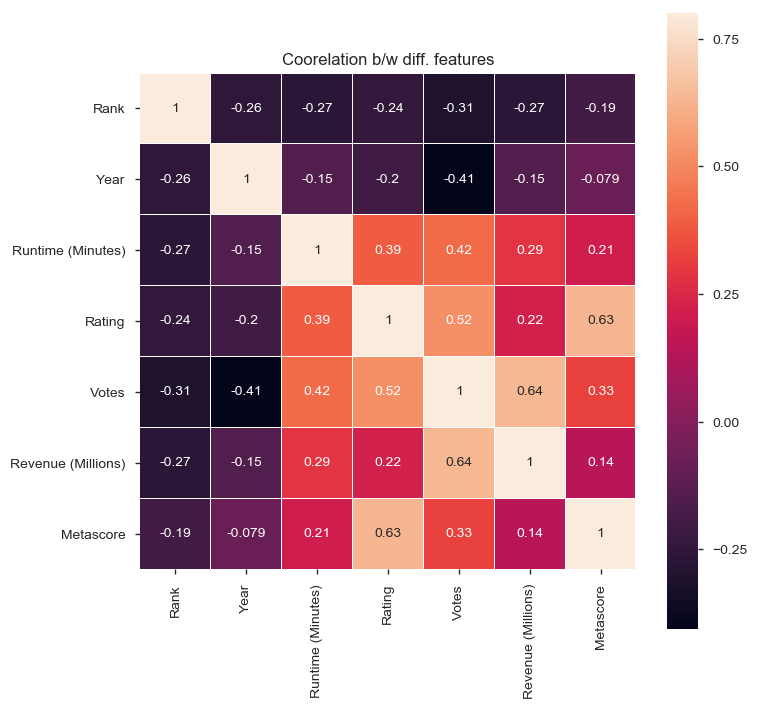

In [14]:
corr = movies.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, vmax=.8, linewidth=.01, square=True, annot=True)
plt.title('Coorelation b/w diff. features')

- There is high correlation b/w Rating & Metascore (critic's rating)
- Movies rated higher have earned more revenues
- People have voted movies with high Runtime more
- Highre Runtime means better rating as well and earned more Revenues as well
- Votes are directly proportional to movie rating
- Votes, Rating, Revenue, Runtime, Metascore have direct correlation with each other though in different proportions

#### Trend and analysis based on YEAR

In [15]:
movies.Year.value_counts().sort_values()

2006     41
2007     46
2009     49
2008     49
2011     58
2010     59
2012     62
2013     86
2014     95
2015    123
2016    268
Name: Year, dtype: int64

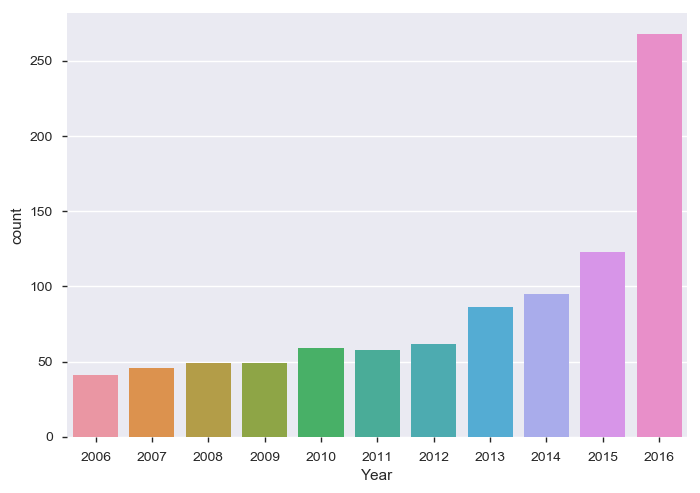

In [16]:
sns.countplot(x='Year', data=movies)

More number of movies are produced year-on-year

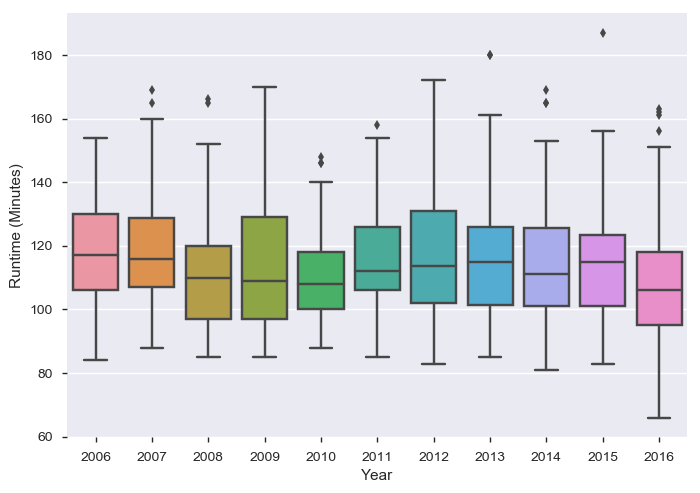

In [17]:
sns.boxplot('Year', 'Runtime (Minutes)', data = movies)

Runtime/duration of movies shrink over a period of time

In [18]:
movies[movies['Year']==2006]['Runtime (Minutes)'].mean()

119.17073170731707

In [19]:
movies[movies['Year']==2016]['Runtime (Minutes)'].mean()

107.8955223880597

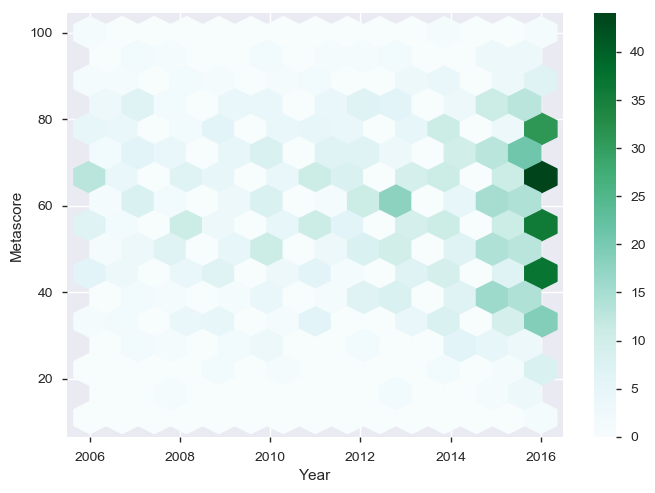

In [20]:
movies.plot.hexbin(x='Year', y='Metascore', gridsize=14)

Critics gave better scores to movies released during recent years 

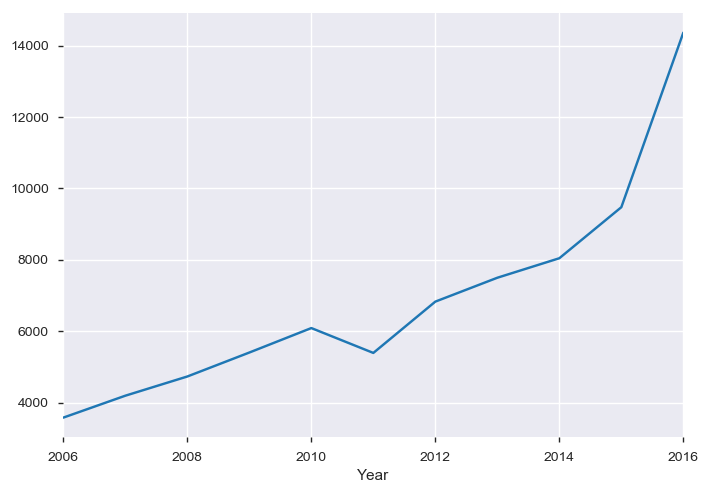

In [21]:
movies.groupby('Year')['Revenue (Millions)'].sum().sort_index().plot.line()

There is an upward Revenue trend due to higher number of movies getting released

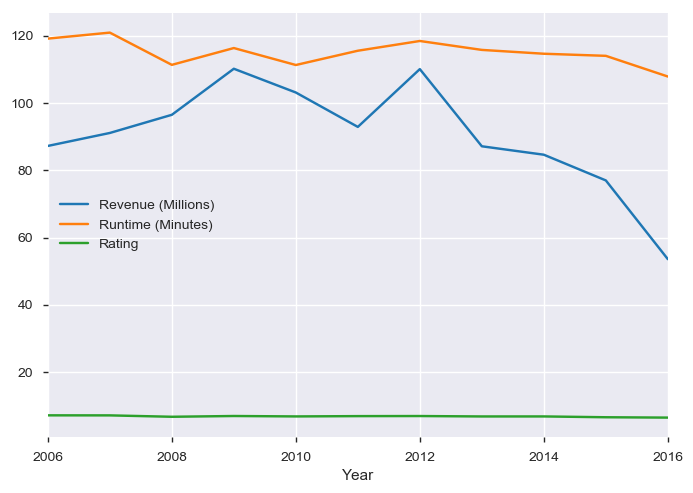

In [22]:
movies.groupby('Year')['Revenue (Millions)', 'Runtime (Minutes)', 'Rating'].mean().plot.line()

Mean value of Revenue and Runtime saw a dip in recent times

#### Trend and analysis based on DIRECTOR

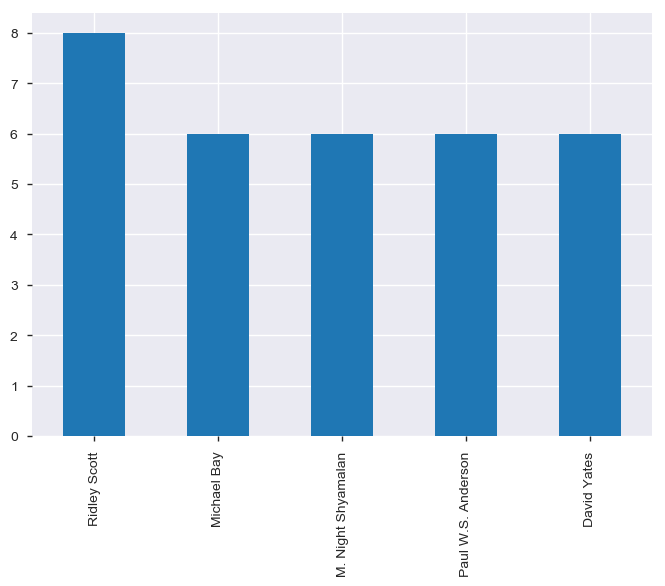

In [23]:
top5_director_movies = movies.Director.value_counts().head(5).plot.bar()
top5_director_movies

Ridley Scott produced highest number of movies which is 8

In [24]:
Top5_directors_revenue = movies.groupby('Director').agg({'Revenue (Millions)': 'mean', 'Runtime (Minutes)': 'mean', 'Metascore': 'mean', 'Rating': 'mean'}).sort_values('Revenue (Millions)', ascending=False)[:5]
Top5_directors_revenue

,Revenue (Millions),Runtime (Minutes),Metascore,Rating
Director,,,,
James Cameron,760.510,162.0,83.0,7.80
Colin Trevorrow,652.180,124.0,59.0,7.00
Joss Whedon,541.135,142.0,67.5,7.75
Lee Unkrich,414.980,103.0,92.0,8.30
Gary Ross,408.000,142.0,68.0,7.20


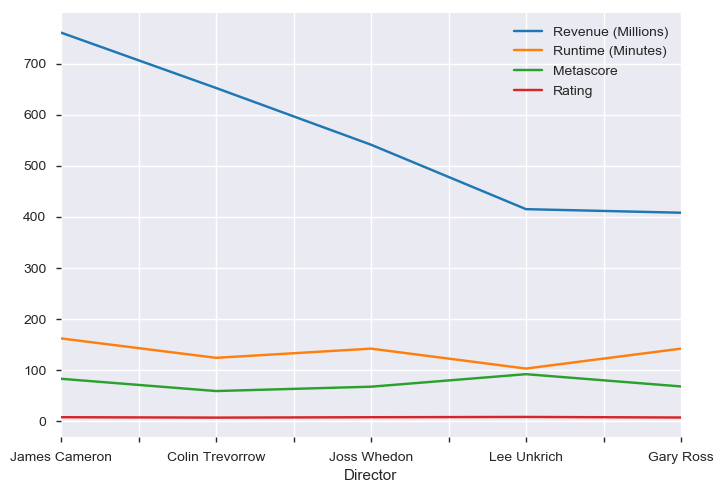

In [25]:
Top5_directors_revenue.plot.line()

James Cameron and Colin are the highest earning directors producing movies of large duration and critics also appraise them

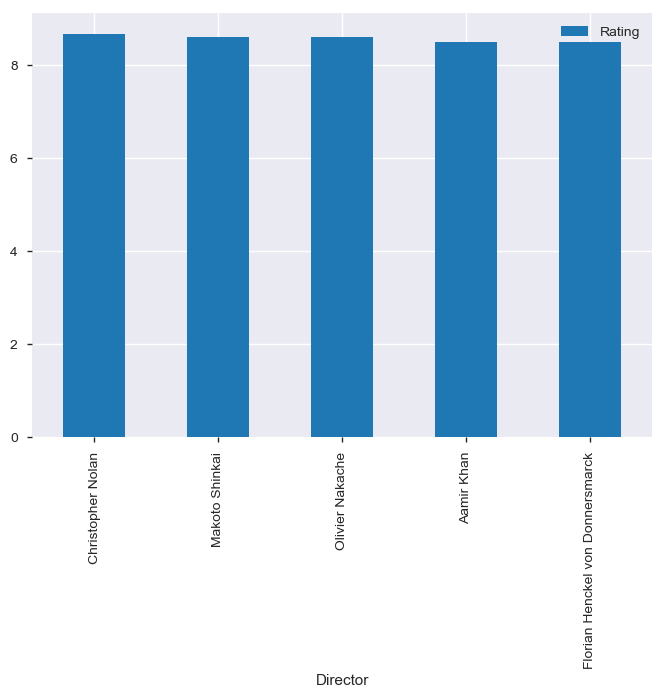

In [26]:
Top5_directors_rating = movies.groupby('Director').agg({'Rating': 'mean'}).sort_values('Rating', ascending=False)[:5]
Top5_directors_rating.plot.bar()

Rating wise all the above directors stand head-to-head with each other

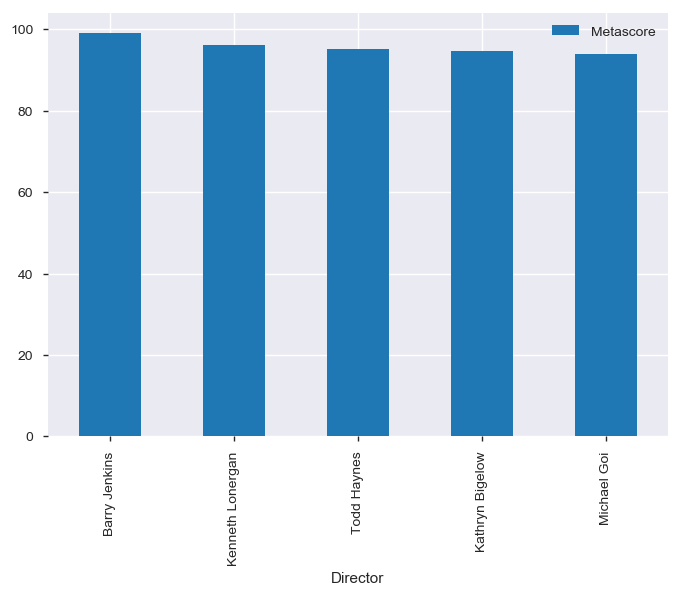

In [27]:
Top5_directors_metascore = movies.groupby('Director').agg({'Metascore': 'mean'}).sort_values('Metascore', ascending=False)[:5]
Top5_directors_metascore.plot.bar()

Same observation as mentioned above holds true for Metascore criteria as well

#### Trend and analysis based on RUNTIME

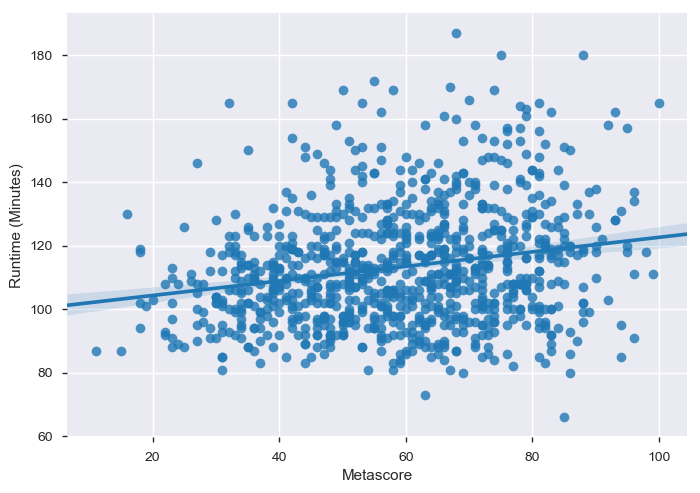

In [28]:
sns.regplot(y='Runtime (Minutes)', x='Metascore', data=movies)

Higher the duration, better is the Metascore

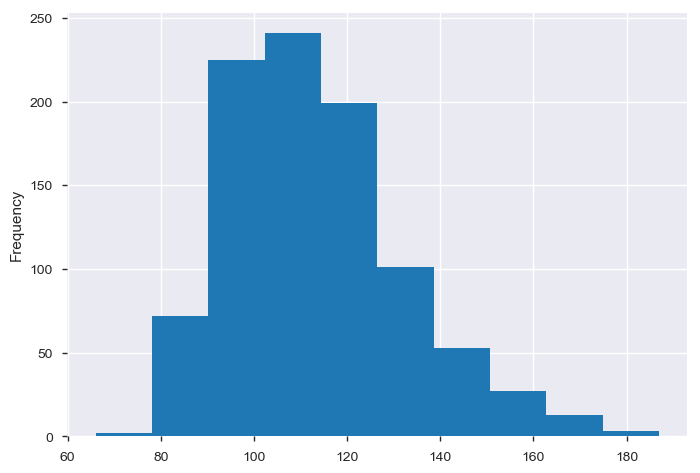

In [29]:
movies['Runtime (Minutes)'].plot.hist()

Most of the movies have average Runtime/ duration of 113 mins.

In [30]:
runtime_bin_edges = [66, 100, 111, 123, 191]
runtime_bin_names = ['Short', 'Medium', 'Long', 'Significantly Long']
movies['Runtime_bins'] = pd.cut(movies['Runtime (Minutes)'], runtime_bin_edges, labels=runtime_bin_names)
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Runtime_bins
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Long
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Significantly Long
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Long
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Medium
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Long


Segregating the Runtime into 4 labels - short, medium, long, significantly long

In [31]:
movies.groupby(['Runtime_bins'])['Runtime_bins'].count()

Runtime_bins
Short                 252
Medium                230
Long                  221
Significantly Long    232
Name: Runtime_bins, dtype: int64

Count of movies falling under different labels

Text(0.5, 1.0, 'Runtime distribution using FacetGrid')

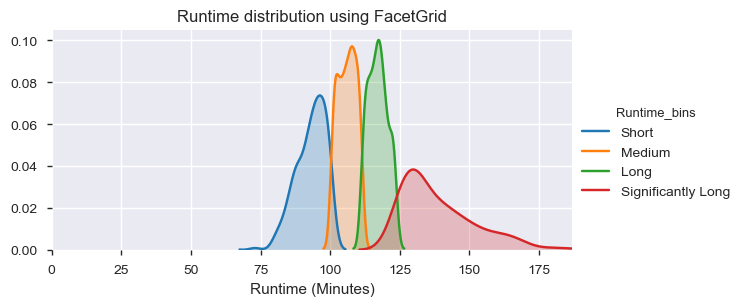

In [32]:
as_fig = sns.FacetGrid(movies,hue='Runtime_bins',aspect=2)

as_fig.map(sns.kdeplot,'Runtime (Minutes)',shade=True)

oldest = movies['Runtime (Minutes)'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()

plt.title('Runtime distribution using FacetGrid')

Duration wise breakup of movie labels

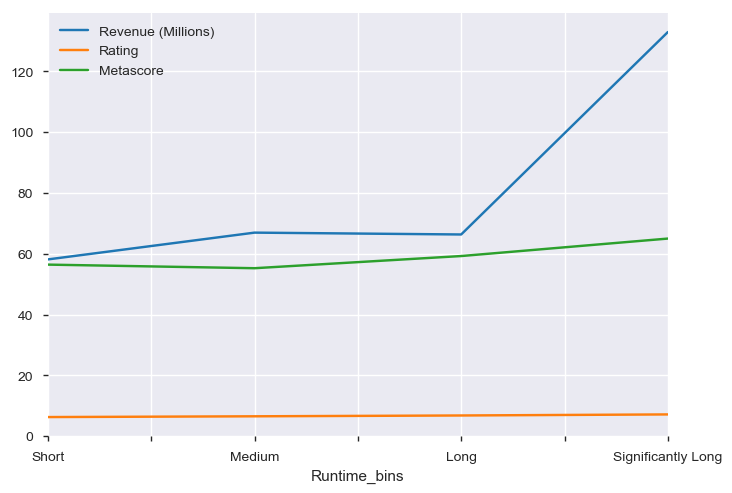

In [33]:
movies.groupby('Runtime_bins').agg({'Revenue (Millions)': 'mean', 'Rating': 'mean', 'Metascore': 'mean'}).sort_values('Runtime_bins', ascending=True).plot.line()

Longer duration movies performed better from all angles. They earn high revenue, liked by audience and critics also appreciate this.

#### Trend and analysis based on GENRE

In [34]:
movies.Genre.nunique()

200

200 different types movies were produced in 10 years

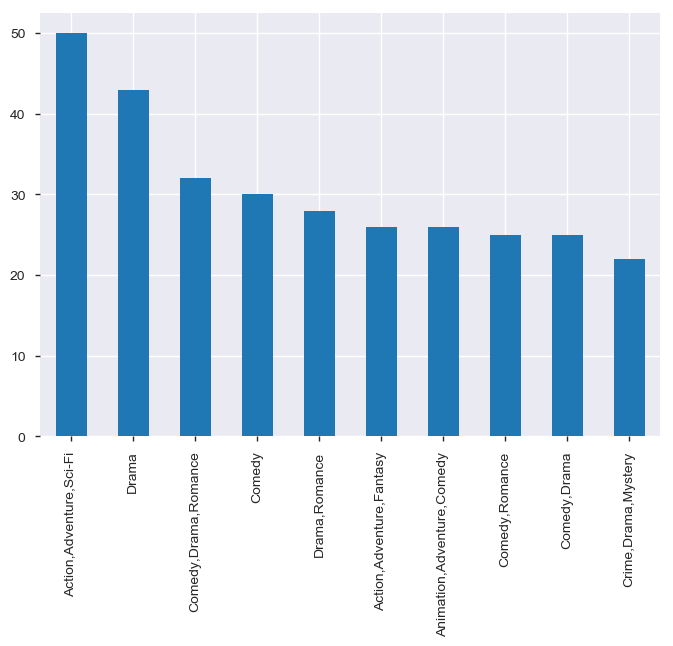

In [35]:
top5_genre = movies.Genre.value_counts().head(10)
top5_genre.plot.bar()

Maximum number of movies belong to Action, Adventure & Sci-Fi combination followed by Drama

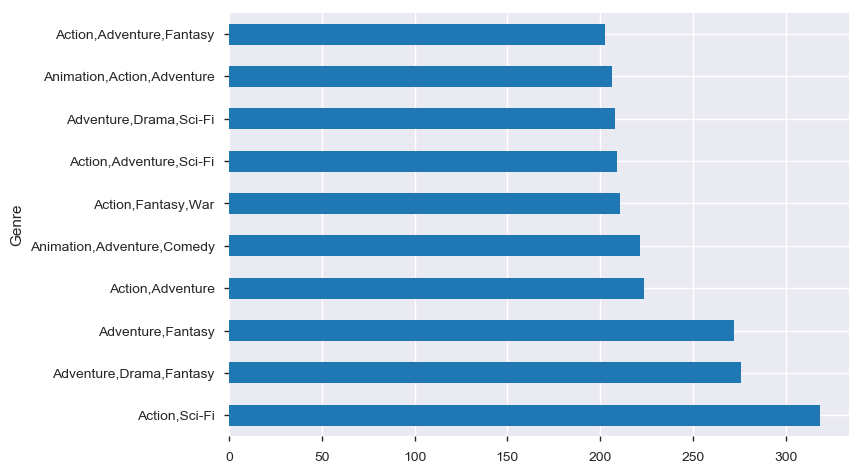

In [36]:
top5_genre = movies.groupby('Genre')['Revenue (Millions)'].mean().sort_values(ascending=False)[:10]
top5_genre.plot.barh()

Action, Sci-Fi movies were most liked by audience. Adventure is another critical parameter for any movie success

In [37]:
movies['Genre_count'] = movies.Genre.str.split(',').str.len()
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Runtime_bins,Genre_count
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Long,3
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Significantly Long,3
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Long,2
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Medium,3
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Long,3


In [38]:
movies.groupby(['Genre_count'])['Genre_count'].count()

Genre_count
1     92
2    220
3    624
Name: Genre_count, dtype: int64

Genres are again classified into 3 groups for ease of doing analysis- 1, 2 and 3

Text(0.5, 1.0, 'Factorplot for Genre vs Revenue')

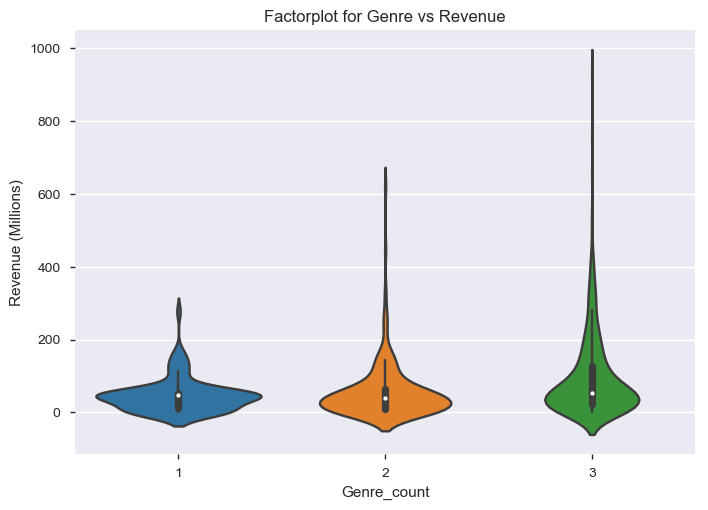

In [39]:
sns.violinplot('Genre_count', 'Revenue (Millions)', kind='point', data=movies)
plt.title('Factorplot for Genre vs Revenue')

Genre with 3 counts have reported highest Revenue

#### Trend and analysis based on Rating

In [40]:
rating_bin_edges = [2, 6.2, 6.8, 7.4, 9]
rating_bin_names = ['Poor', 'Okay', 'Good', 'Very Good']
movies['Rating_bins'] = pd.cut(movies['Rating'], rating_bin_edges, labels=rating_bin_names)
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Runtime_bins,Genre_count,Rating_bins
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Long,3,Very Good
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Significantly Long,3,Good
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Long,2,Good
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Medium,3,Good
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Long,3,Poor


Rating has been classified into 3 bins- Poor, Okay, Good and V.Good 

Text(0.5, 1.0, 'Rating vs Genre')

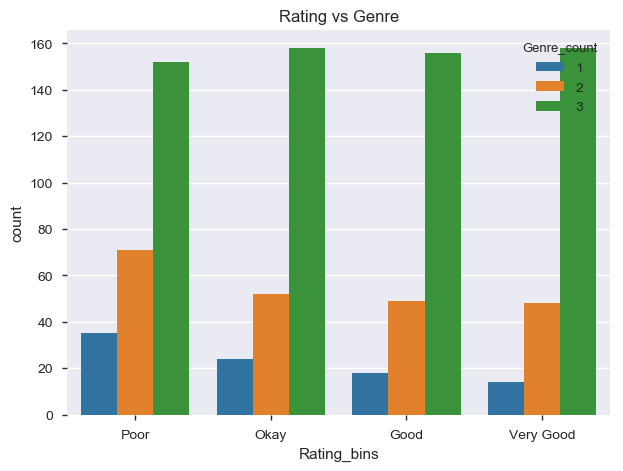

In [41]:
fig, ax = plt.subplots(figsize=(7,5))
sns.countplot('Rating_bins', data=movies, hue='Genre_count')
plt.title('Rating vs Genre')

Movies with 3 genres have been rated highest

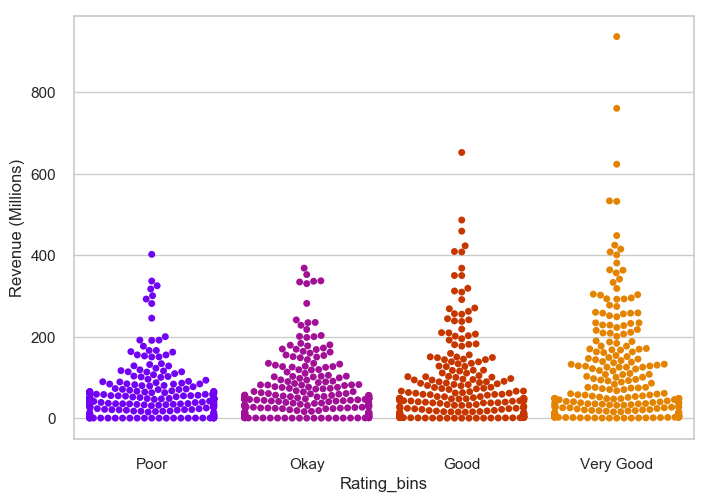

In [42]:
sns.set(style="whitegrid", palette="muted")
pd.melt(movies, "Rating_bins")
sns.swarmplot(x="Rating_bins", y="Revenue (Millions)", palette='gnuplot', data=movies)

Movies with Good and V.Good ratings have earned greater revenues

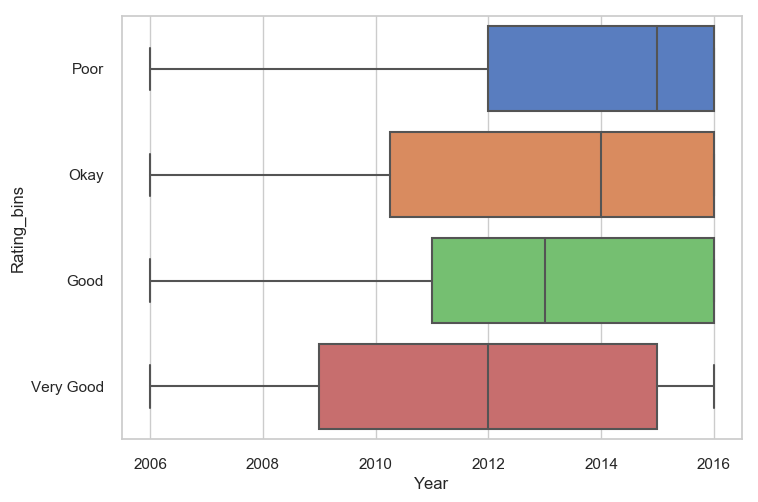

In [43]:
sns.boxplot(x= 'Year', y='Rating_bins', data = movies)

With year passes by, user ratings have gone down considerably

Text(0.5, 1.0, 'Rating distribution using FacetGrid')

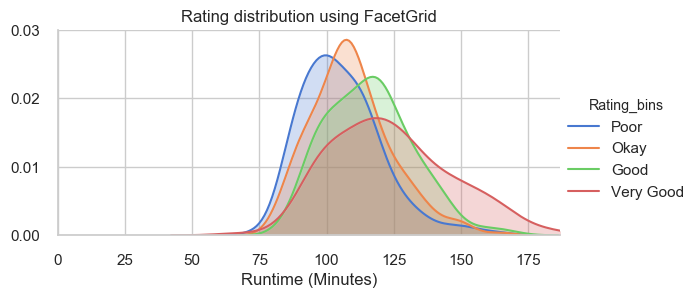

In [44]:
as_fig = sns.FacetGrid(movies,hue='Rating_bins',aspect=2)

as_fig.map(sns.kdeplot,'Runtime (Minutes)',shade=True)

oldest = movies['Runtime (Minutes)'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()

plt.title('Rating distribution using FacetGrid')

Movies with higher Runtimes/duration have been rated better by audiences

#### Trend and analysis based on METASCORE

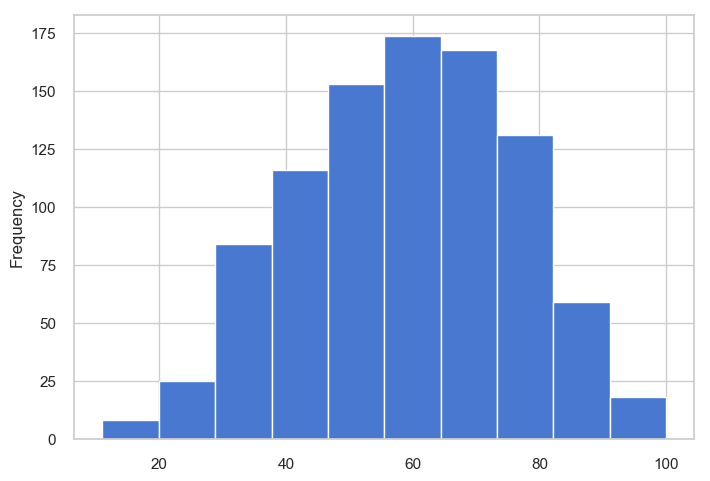

In [45]:
movies.Metascore.plot.hist()

Mean Metascore stands at around 60 and follow almost uniform distribution curve

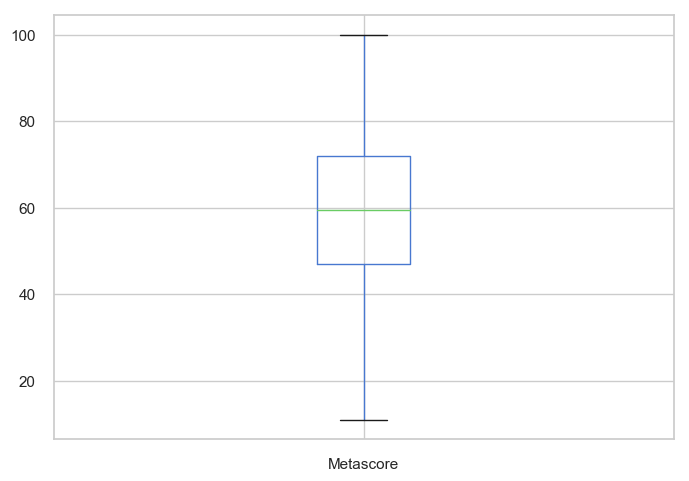

In [46]:
movies['Metascore'].plot(kind='box')

In [47]:
revenue_bin_edges = [0, 13.27, 47.98, 113.75, 936.63]
revenue_bin_names = ['Poor', 'Marginal', 'Fair', 'High']
movies['Revenue_bins'] = pd.cut(movies['Revenue (Millions)'], revenue_bin_edges, labels=revenue_bin_names)
movies.head(2)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Runtime_bins,Genre_count,Rating_bins,Revenue_bins
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Long,3,Very Good,High
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Significantly Long,3,Good,High


Revenue has been classified into 4 sub-categories: Poor, Marginal, Fair & High

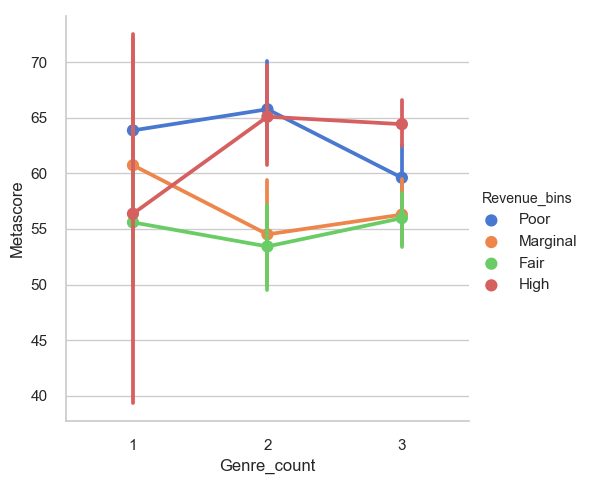

In [48]:
sns.factorplot('Genre_count', 'Metascore', data=movies, hue='Revenue_bins')

Metascore and Revenue earning is high for movies with 3 genres. Metascore with 55 score and genre 1 has Poor revenues while with genre 2 & 3 have Metascore of 65

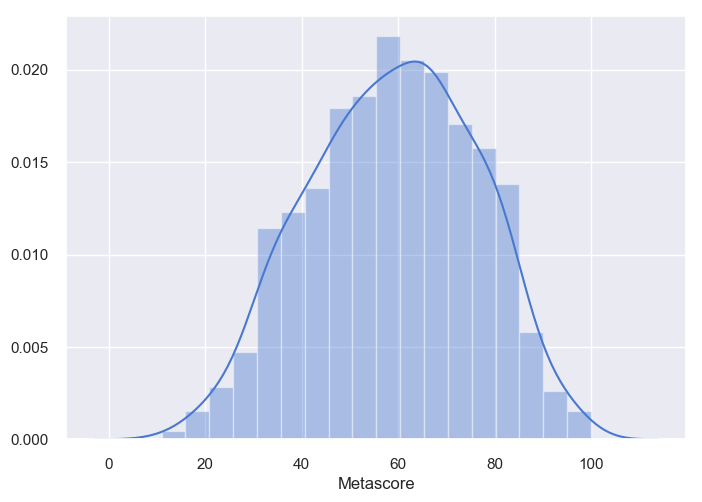

In [49]:
sns.set(color_codes=True)
sns.set_palette(sns.color_palette('muted'))

sns.distplot(movies['Metascore'].dropna())

Above graph shows Metascore distribution plot

Creating a copy of dataframe into memory location

In [50]:
movies_new = movies.copy(deep=True)

Converting categorical values into nukerical codes below using Labelencoder

In [51]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
for i in movies_new.columns:
    movies_new[i] = number.fit_transform(movies_new[i].astype('str'))
movies_new.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Runtime_bins,Genre_count,Rating_bins,Revenue_bins
0,0,256,11,102,247,178,8,21,47,837,452,61,0,2,3,1
1,106,531,80,505,486,688,6,24,36,661,131,50,3,2,0,1
2,209,611,189,823,368,394,10,17,39,182,163,47,0,1,0,1
3,315,592,87,573,101,613,10,8,38,754,378,44,1,2,0,1
4,417,629,7,209,129,908,10,23,28,581,445,25,0,2,2,1


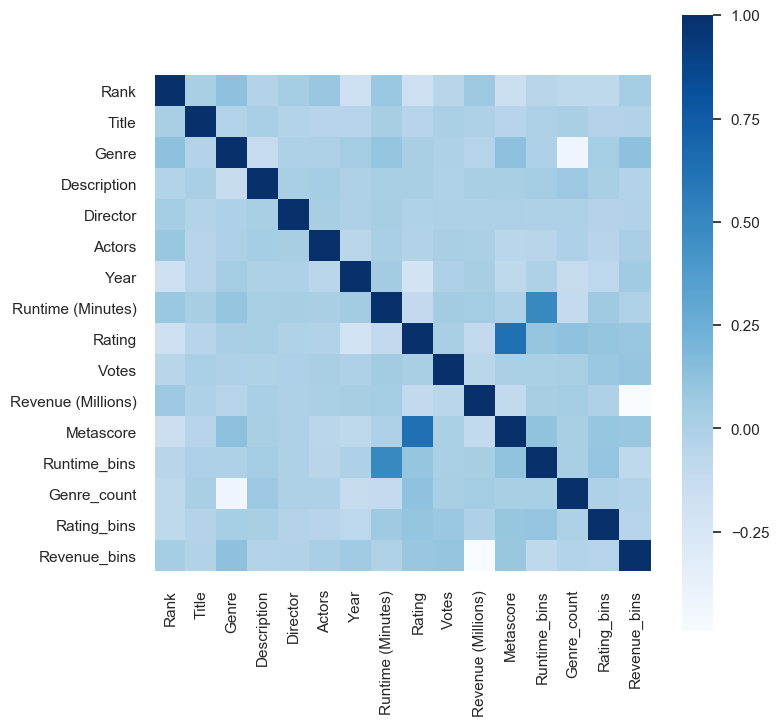

In [52]:
features_correlation = movies_new.corr()
plt.figure(figsize=(8,8))
sns.heatmap(features_correlation, vmax=1, square=True, annot=False, cmap='Blues')
plt.show()

Plotting the Heatmap on overall parameters on their numerical correlation. Findings:
- There were more number of movies getting produced in later years almost 5 times than that of initial year, 2006
- Though no. of movies produced have increased but their 'Runtime' has reduced over a period of time significantly
- Movies have higher 'Metascore' in 2016 as compared to previous years 
- As visible, movies having >75% Metascore have almost similar trend as no. of movies being produced
- Strange to see that average 'Revenue' has come down drastically in last 10 years. Net Revenue has increased due to more movies getting produced 
- Average vaue of Rating is almost constant over the years

Text(0.5, 1.0, 'Pair Plot')

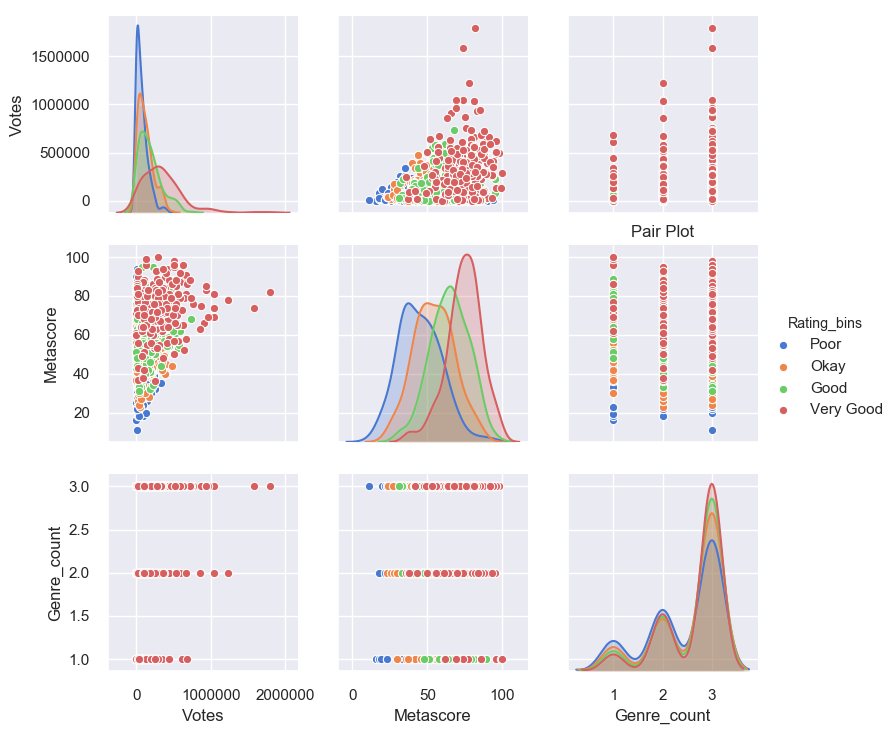

In [68]:
sns.pairplot(movies[["Votes","Metascore","Genre_count","Rating_bins"]], vars=["Votes","Metascore","Genre_count"], hue="Rating_bins", dropna=True)
plt.title('Pair Plot')

From the pairplot, it is observed that:
- Movies having higher ratings have received large no. of votes
- Higher Metascore ensures better ratings and higher votes
- Movies having 3 genres have performed better with good Metascore and larger count of votes as well 

### Conclusion

Based on the data analysis done using Python as the programming language, below inferences can be summarized:
- Though the movies production has increased significantly, but the revenue, duration and user’s rating have seen a downfall
- There is no direct relation b/w directors producing more number of movies vs their revenue earning
- User rating and critic’s score stand in equilibrium for top rated directors
- Though there is similar ratio of movies by duration count, still longer duration movies have much better chances of generating positive ratings/score and higher revenue
- 4 genres vis-à-vis Adventure, Action, Sci-Fi & Drama have been liked by audience more than any other genre
- A combination of 3 genres (consisting above categories) attract larger people to the cinema halls thereby create more profitable business for producers, actors and directors
- During 2010 to 2014, quality of movies were far better than any other years
- Critics have maintained a steady judgement over given timeframe and on an average 60% is their verdict score for most of the movies

### Recommendations

Based on the findings from EDA would like to recommend below:
- Top directors with proven track record should be pitched in while going for any new movie production
- Movie duration should be maintained >2 hrs. for better results and audience appeal
- irrespective of hovering around multiple genres, it’s best to stick to combo of selected few one’s having more customer liking
- User’s ratings/votes are influenced by critic’s review during any new movie release and therefore feedback shared by them should never be ignored while directing/producing new movies
- Focus should be more on quality of movies rather than the count in order to make market credibility and audience confidence

**The End**